In [1]:
#### Problem 3a #### 
import numpy as np
import matplotlib.pyplot as plt
mu = np.array([[3],[-1]])
sigma = [[7,3],[3,2]]

Xs = np.random.randn(2,1000)

fig = plt.figure(num=None, figsize=(4, 4), dpi=120, facecolor='w', edgecolor='k')
plt.scatter(Xs[0,:], Xs[1,:], alpha=0.1)
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Text(0, 0.5, '$x_2$')

Text(0, 0.5, '$x_2$')

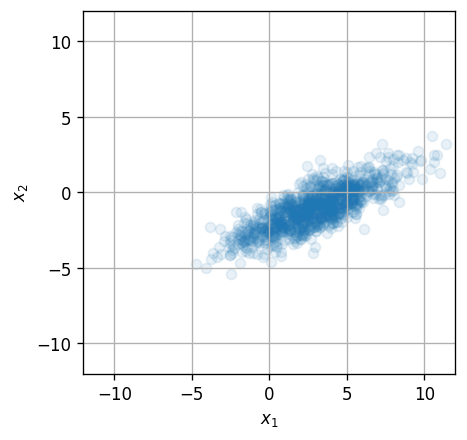

In [2]:
A = np.linalg.cholesky(sigma)
X = A@Xs + mu

fig = plt.figure(num=None, figsize=(4, 4), dpi=120, facecolor='w', edgecolor='k')
plt.scatter(X[0,:], X[1,:], alpha=0.1)
plt.ylim((-12,12))
plt.xlim((-12,12))
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [3]:
# Problem 3b
import numpy as np
import matplotlib.pyplot as plt
mu0 = np.array([[1],[0]])
sigma0 = [[8,3],[3,2]]

mu1 = np.array([[0],[2]])
sigma1 = [[1,0.1],[0.1,1]]

###
X0 = np.linalg.cholesky(sigma0)@np.random.randn(2,1000) + mu0
X1 = np.linalg.cholesky(sigma1)@np.random.randn(2,1000) + mu1


### 
c = np.log(np.linalg.det(sigma0)) - np.log(np.linalg.det(sigma1)) \
    + mu0.T@np.linalg.inv(sigma0)@mu0 - mu1.T@np.linalg.inv(sigma1)@mu1
w = 2*(np.linalg.inv(sigma0)@mu0 - np.linalg.inv(sigma1)@mu1)
B = np.linalg.inv(sigma1) - np.linalg.inv(sigma0)

print(c)
print(w)
print(B)

[[-1.79872927]]
[[ 0.97546898]
 [-4.8975469 ]]
[[ 0.72438672  0.32756133]
 [ 0.32756133 -0.13275613]]


Text(0, 0.5, '$x_2$')

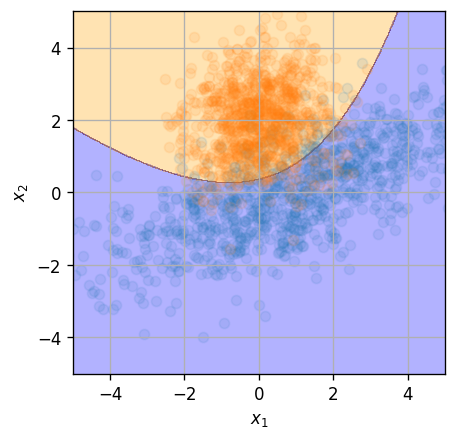

In [4]:
n = 400
x1g = np.linspace(-5, 5, n)
x2g = np.linspace(-5, 5, n)
#grid = [np.array([[xx],[yy]]) for xx in xg for yy in yg]
decision_space = -1*np.ones((n,n))

for i, x1 in enumerate(x1g):
    for j, x2 in enumerate(x2g):
        x = np.array([[x1],[x2]])
        if (x.T@B@x + w.T@x - c)[0,0] < 0:
            decision_space[j,i] = 1           
            
fig = plt.figure(num=None, figsize=(4, 4), dpi=120, facecolor='w', edgecolor='k')

plt.contourf(x1g, x2g, decision_space, alpha=0.3, colors=['blue','orange'])
plt.scatter(X0[0,:], X0[1,:], alpha=0.1)
plt.scatter(X1[0,:], X1[1,:], alpha=0.1)

plt.ylim((-5,5))
plt.xlim((-5,5))
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [8]:
#4d 
type_0_errors = 0
for x in X0.T:
    x = x.T
    if x.T@B@x + w.T@x < c:
        type_0_errors +=1
print('errors when y=0:', type_0_errors/1000)

type_1_errors = 0
for x in X1.T:
    x = x.T
    if x.T@B@x + w.T@x > c:
        type_1_errors +=1
print('errors when y=1:', type_1_errors/1000)

print('total error rate', (type_0_errors + type_1_errors)/2000)

errors when y=0: 0.085
errors when y=1: 0.075
total error rate 0.08
